<a href="https://colab.research.google.com/github/Imama-Kainat/ByteWise-MLDL/blob/main/PenguinClusteringML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This task was about penguin clustering where dataset of penguin was given and we have to cluster the penguin considering the features.

Use kmean clustering
for identifying the cluster use elbow method.


for understanding algorithm:https://youtu.be/5shTLzwAdEc?si=4h6i59TM6phVJJNO

*Standardization* is a common preprocessing step in machine learning, especially for algorithms that are sensitive to the scale of the data, such as K-means clustering, SVM, and logistic regression.
z= x-μ/std




In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [27]:
# Load the data
penguins_df = pd.read_csv("/content/penguins.csv")
print(penguins_df.head())



   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex
0              39.1             18.7              181.0       3750.0    MALE
1              39.5             17.4              186.0       3800.0  FEMALE
2              40.3             18.0              195.0       3250.0  FEMALE
3              36.7             19.3              193.0       3450.0  FEMALE
4              39.3             20.6              190.0       3650.0    MALE


In [28]:
# Check for missing values
print("Missing values before dropping any rows:")
print(penguins_df.isna().sum())



Missing values before dropping any rows:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [18]:
# Drop rows with missing values
penguins_df = penguins_df.dropna()

# Ensure no missing values remain
print("Missing values after dropping rows:")
print(penguins_df.isna().sum())



Missing values after dropping rows:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [19]:
# Convert categorical variables (if any)
penguins_df['sex'] = penguins_df['sex'].map({'MALE': 1, 'FEMALE': 0})

# Check if any NaN values have been introduced
print("Missing values after mapping 'sex':")
print(penguins_df.isna().sum())



Missing values after mapping 'sex':
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [20]:
# Select features for clustering
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(penguins_df[features])

# Ensure no NaN values in standardized data
print("Any NaN values in standardized data:")
print(pd.DataFrame(X, columns=features).isna().sum())



Any NaN values in standardized data:
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


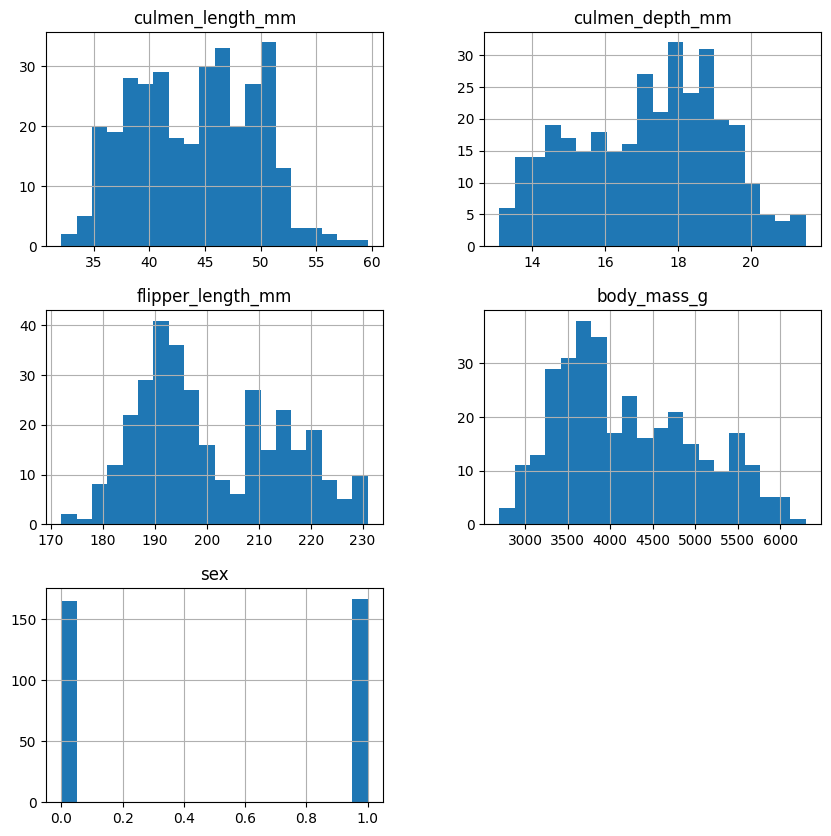

In [21]:
# Exploratory Data Analysis (EDA)
penguins_df.hist(bins=20, figsize=(10, 10))
plt.show()



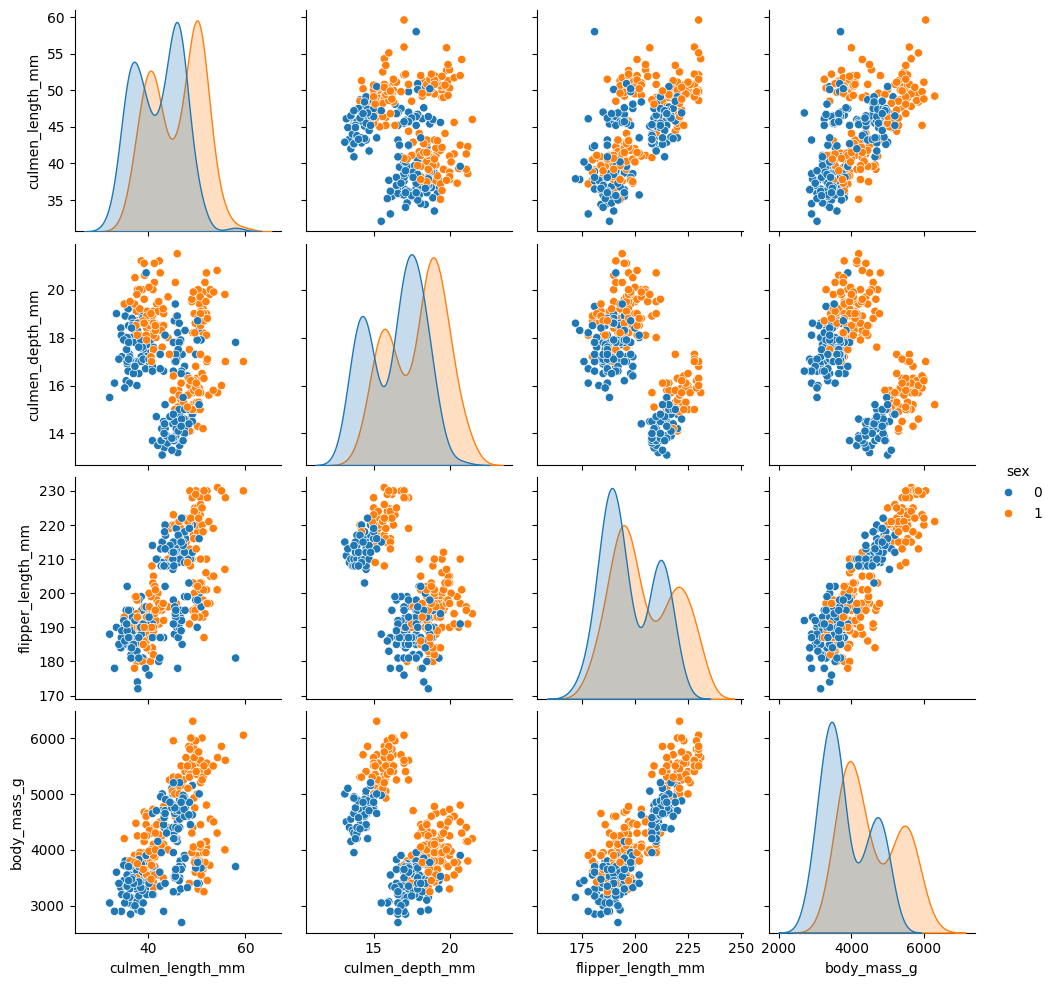

In [22]:
sns.pairplot(penguins_df, hue='sex')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

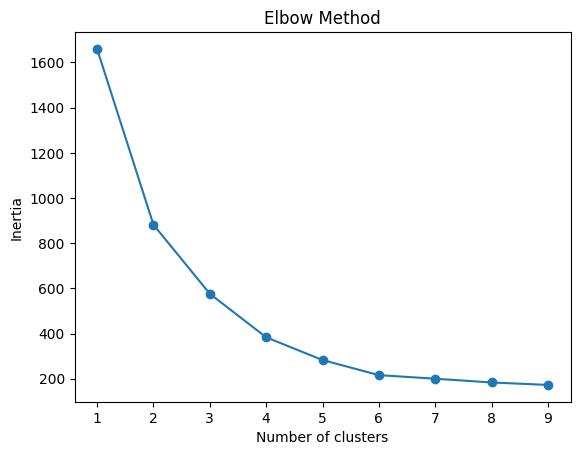

In [23]:
# Step 4 - Detect the optimal number of clusters for K-means clustering
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


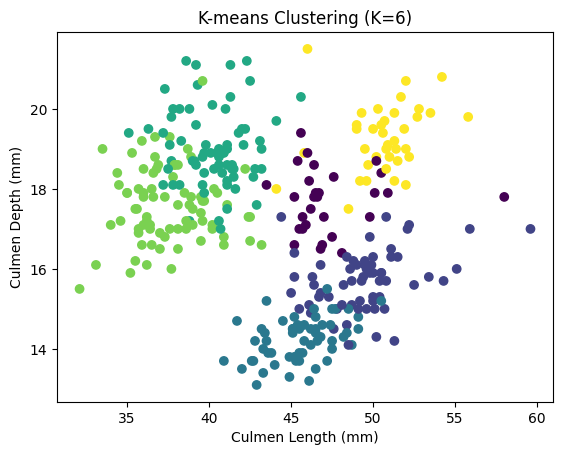

In [29]:
# Based on the elbow plot, choose the optimal number of clusters
n_clusters = 6  # For example, you can choose 4 clusters based on the elbow plot

# Run the K-means clustering algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
penguins_df['label'] = kmeans.labels_

# Visualize the clusters
plt.scatter(penguins_df['culmen_length_mm'], penguins_df['culmen_depth_mm'], c=penguins_df['label'], cmap='viridis')
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title(f'K-means Clustering (K={n_clusters})')
plt.show()


In [30]:

# Create final stat_penguins DataFrame
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'label']
stat_penguins = penguins_df[numeric_columns].groupby('label').mean()
print(stat_penguins)


       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             47.310345        17.706897         192.758621  3569.827586
1             49.473770        15.718033         221.540984  5484.836066
2             45.563793        14.237931         212.706897  4679.741379
3             40.260870        19.026087         191.985507  4035.144928
4             37.580769        17.575641         187.666667  3363.141026
5             50.624324        19.270270         199.945946  3953.378378
